In [ ]:
import pandas as pd

df_data = pd.read_csv("/blackbox/data-2.csv")
print(df_data.shape)

(4000000, 4)


# 1st iteration 1-2500 steps

In [ ]:
df_data_1st = df_data.loc[df_data["Step"] <= 2500]
df_data_1st

,Unnamed: 0,Step,Domain,Data
0,0,1,Q1,8
1,1,1,Q1,7
2,2,1,Q1,4
3,3,1,Q1,3
4,4,1,Q1,4
...,...,...,...,...
999995,999995,2500,Q4,6
999996,999996,2500,Q4,7
999997,999997,2500,Q4,9
999998,999998,2500,Q4,6


# Take Q3 quadrant as an example to show the network data generation

# Q3 quadrant

In [ ]:
df_data_1st_Q3 = df_data_1st.loc[df_data_1st["Domain"] == "Q3"]
df_data_1st_Q3

,Unnamed: 0,Step,Domain,Data
200,200,1,Q3,3
201,201,1,Q3,8
202,202,1,Q3,9
203,203,1,Q3,1
204,204,1,Q3,9
...,...,...,...,...
999985,999985,2500,Q3,0
999986,999986,2500,Q3,0
999987,999987,2500,Q3,0
999988,999988,2500,Q3,0


<AxesSubplot:ylabel='Frequency'>

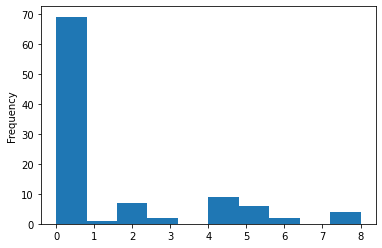

In [ ]:
df_Q3_per_step = df_data_1st_Q3.loc[df_data_1st_Q3["Step"] == 200]
df_Q3_per_step["Data"].plot(kind='hist')

In [ ]:
df_Q3_per_step.groupby(['Data'])['Data'].count()

Data
0    69
1     1
2     7
3     2
4     9
5     6
6     2
8     4
Name: Data, dtype: int64

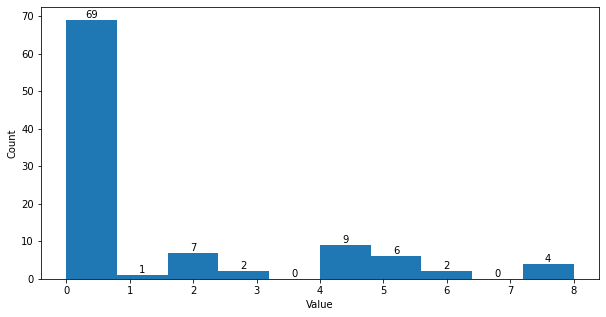

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
values, bins, bars = plt.hist(df_Q3_per_step['Data'])
plt.xlabel("Value")
plt.ylabel("Count")
plt.bar_label(bars, fontsize=10)
plt.show()

# Time series for each cell

In [ ]:
from functools import reduce
import numpy as np
import pandas as pd
# transform to time series format based on steps

step_list = [i for i in range(1, 2501)]
df_data_Q3_step_list = [list(df_data_1st_Q3.loc[df_data_1st_Q3["Step"] == i]["Data"]) for i in step_list]
array_data_Q3_step_list = np.array(df_data_Q3_step_list)
cell_list = ["c"+str(i) for i in range(1, 101)]
df_Q3_time_series = pd.DataFrame(array_data_Q3_step_list, columns = cell_list)

In [ ]:
df_Q3_time_series.shape

(2500, 100)

In [ ]:
array_data_Q3_step_list

array([[3, 8, 9, ..., 3, 5, 6],
       [3, 8, 9, ..., 3, 5, 6],
       [3, 8, 9, ..., 3, 5, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
array_data_Q3_step_list.shape

(2500, 100)

In [ ]:
array_dif_Q3 = np.diff(array_data_Q3_step_list, axis=0)
print(array_dif_Q3.shape)

(2499, 100)


In [ ]:
change_count = np.count_nonzero(array_dif_Q3 != 0, axis=1)
print(change_count.shape)
print(list(change_count))

(2499,)
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

In [ ]:
# find out nonzero indices from change matrix
# change value (1 dimensional matrix)
change_value = array_dif_Q3[np.nonzero(array_dif_Q3)]
# indices
change_indices_array = np.nonzero(array_dif_Q3)
change_indices = np.transpose(np.nonzero(array_dif_Q3))
print(change_value.shape)
print(change_indices.shape)

(162,)
(162, 2)


In [ ]:
current_value_list = [array_data_Q3_step_list[i][j] for i, j in zip(list(change_indices_array[0]),list(change_indices_array[1]))]
target_value_list = [array_data_Q3_step_list[i+1][j] for i, j in zip(list(change_indices_array[0]),list(change_indices_array[1]))]
change_value_list = [array_dif_Q3[i][j] for i, j in zip(list(change_indices_array[0]),list(change_indices_array[1]))]

print(len(current_value_list))
print(current_value_list)
print(len(target_value_list))
print(target_value_list)
print(len(change_value_list))
print(change_value_list)

162
[9, 2, 7, 3, 6, 6, 3, 7, 8, 9, 5, 2, 2, 6, 9, 9, 7, 7, 7, 4, 6, 6, 6, 2, 9, 8, 4, 8, 3, 9, 8, 9, 1, 8, 1, 6, 8, 4, 2, 6, 2, 9, 1, 9, 8, 5, 1, 7, 3, 6, 3, 3, 2, 2, 8, 8, 6, 5, 4, 8, 1, 4, 7, 3, 1, 2, 2, 3, 4, 8, 8, 1, 8, 5, 9, 2, 9, 3, 4, 8, 9, 5, 2, 5, 9, 5, 1, 8, 3, 3, 8, 7, 8, 6, 1, 8, 5, 2, 2, 8, 6, 8, 6, 4, 6, 9, 2, 5, 2, 1, 6, 9, 4, 3, 2, 2, 4, 2, 4, 5, 4, 4, 5, 8, 9, 5, 5, 5, 4, 5, 3, 8, 4, 4, 4, 2, 6, 1, 4, 8, 6, 5, 2, 3, 5, 2, 2, 8, 4, 2, 4, 2, 2, 2, 8, 4, 5, 8, 5, 4, 2, 4]
162
[8, 6, 8, 6, 2, 8, 4, 3, 0, 5, 0, 4, 6, 8, 2, 0, 5, 6, 3, 2, 2, 0, 0, 8, 8, 0, 0, 0, 4, 4, 4, 2, 0, 0, 8, 8, 4, 0, 0, 2, 8, 3, 4, 3, 4, 0, 8, 6, 1, 8, 5, 9, 0, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 5, 0, 6, 9, 8, 2, 0, 8, 2, 0, 8, 0, 0, 0, 0, 4, 5, 0, 4, 0, 0, 0, 0, 0, 2, 4, 0, 6, 4, 0, 0, 0, 0, 6, 0, 0, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 5, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
162
[-1, 4, 1, 3, 

In [ ]:
# step value change table 

df_Q3_value_change = pd.DataFrame(data={"Step": list(change_indices_array[0]+1), "Cell#": list(change_indices_array[1]+1),"Current_value": current_value_list, "Target_value": target_value_list, "Change_value": change_value_list})
df_Q3_value_change

,Step,Cell#,Current_value,Target_value,Change_value
0,1,96,9,8,-1
1,2,74,2,6,4
2,3,68,7,8,1
3,4,43,3,6,3
4,5,65,6,2,-4
...,...,...,...,...,...
157,489,23,8,0,-8
158,540,11,5,0,-5
159,545,64,4,0,-4
160,597,63,2,0,-2


In [ ]:
df_Q3_value_change.to_csv("/blackbox/df_Q3_value_change_1st2500.csv")

# Network data generation

In [ ]:
df_Q3_value_change_nx = df_Q3_value_change
df_Q3_value_change_nx['Count'] = df_Q3_value_change_nx.groupby(['Current_value', 'Target_value'])['Current_value'].transform('size')
df_Q3_value_change_nx['Total_change'] = df_Q3_value_change_nx['Count'] * df_Q3_value_change_nx['Change_value']
# use Current_value and Target_value to group and only keep the first entry
newdf1 = df_Q3_value_change_nx.drop_duplicates(subset = ['Current_value', 'Target_value'], keep = 'last').reset_index(drop = True)
newdf1["check"] = newdf1.apply(
    lambda x: not newdf1[
        (newdf1["Current_value"] == x["Target_value"]) & (newdf1["Target_value"] == x["Current_value"]) & (newdf1.index != x.name)
    ].empty,
    axis=1,
)

# filter those who are inversible for current value and target value
df1 = newdf1[newdf1['check'] == False]
df2 = newdf1[newdf1['check'] == True]

In [ ]:
newdf1

,Step,Cell#,Current_value,Target_value,Change_value,Count,Total_change,check
0,3,68,7,8,1,1,1,False
1,4,43,3,6,3,1,3,False
2,20,33,7,5,-2,1,-2,False
3,22,6,7,3,-4,2,-8,False
4,33,23,9,4,-5,1,-5,False
5,36,5,9,2,-7,2,-14,False
6,48,74,6,2,-4,3,-12,True
7,49,17,2,8,6,2,12,True
8,57,62,1,4,3,1,3,False
9,58,82,9,3,-6,2,-12,True


In [ ]:
df_Q3_value_change_nx.to_csv("/blackbox/df_Q3_value_change_nx_1st2500.csv")

# Deal with all inversible value pairs

In [ ]:
df2

,Step,Cell#,Current_value,Target_value,Change_value,Count,Total_change,check
6,48,74,6,2,-4,3,-12,True
7,49,17,2,8,6,2,12,True
9,58,82,9,3,-6,2,-12,True
15,102,98,3,9,6,2,12,True
22,136,2,8,4,-4,5,-20,True
23,147,5,2,6,4,4,16,True
24,165,64,6,4,-2,4,-8,True
25,168,94,4,6,2,1,2,True
28,217,48,8,2,-6,5,-30,True
29,228,23,4,8,4,3,12,True


In [ ]:
df2 = df2.reset_index()
pass_list = []
index_list = []

for i in range(0, df2['Current_value'].shape[0]):
    for j in range(0, df2['Target_value'].shape[0]):
        if df2.at[i, 'Current_value'] == df2.at[j, 'Target_value'] and df2.at[i, 'Target_value'] == df2.at[j, 'Current_value'] and [df2.at[i, 'Target_value'], df2.at[i, 'Current_value']] not in pass_list:
            df2.at[i, 'Total_change'] = df2.at[i, 'Total_change'] + df2.at[j, 'Total_change']
            pass_list.append([df2.at[i, 'Current_value'], df2.at[i, 'Target_value']])
            index_list.append(j)   

df2 = df2.drop(df2.index[[index_list]])
df2 = df2[['Step', 'Cell#', 'Current_value', 'Target_value', 'Change_value', 'Count', 'Total_change', 'check']]
df2

/Users/visionwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Step,Cell#,Current_value,Target_value,Change_value,Count,Total_change,check
0,48,74,6,2,-4,3,4,True
1,49,17,2,8,6,2,-18,True
2,58,82,9,3,-6,2,0,True
4,136,2,8,4,-4,5,-8,True
6,165,64,6,4,-2,4,-6,True
10,335,62,4,2,-2,2,2,True


In [ ]:
df_Q3_nx = pd.concat([df1, df2], axis=0)
df_Q3_nx

,Step,Cell#,Current_value,Target_value,Change_value,Count,Total_change,check
0,3,68,7,8,1,1,1,False
1,4,43,3,6,3,1,3,False
2,20,33,7,5,-2,1,-2,False
3,22,6,7,3,-4,2,-8,False
4,33,23,9,4,-5,1,-5,False
5,36,5,9,2,-7,2,-14,False
8,57,62,1,4,3,1,3,False
10,66,39,3,1,-2,1,-2,False
11,68,26,6,8,2,4,8,False
12,85,67,1,2,1,1,1,False


In [ ]:
df_Q3_nx.to_csv("/blackbox/df_Q3_nx.csv")

{(7, 8): Text(-0.383210589217024, 0.4744668146737915, '1'),
 (7, 5): Text(-0.6985705889954978, 0.4789476459964553, '-2'),
 (7, 3): Text(-0.010674760271079275, 0.32570842042501913, '-8'),
 (7, 0): Text(-0.26983425777519743, 0.2522434580389392, '-7'),
 (7, 6): Text(0.24441018301828218, 0.60806986607778, '-3'),
 (8, 6): Text(0.25834077179225395, 0.21265191773279768, '8'),
 (8, 1): Text(-0.4044618756133628, -0.43329249509816326, '21'),
 (8, 9): Text(-0.08128208780997975, 0.3762356629725977, '-3'),
 (8, 0): Text(-0.2559036690012257, -0.14317449030604315, '-128'),
 (8, 2): Text(-0.07273391015792724, 0.10859079902378782, '-18'),
 (8, 4): Text(0.14351552995369132, -0.2931029134150436, '-8'),
 (3, 6): Text(0.6308766007381986, 0.06389352348402538, '3'),
 (3, 1): Text(-0.031926046667418106, -0.5820508893469355, '-2'),
 (3, 2): Text(0.29980191878801743, -0.040167595224984476, '-1'),
 (3, 4): Text(0.516051358899636, -0.4418613076638158, '3'),
 (3, 5): Text(-0.31210417127558143, -0.06522869659729941

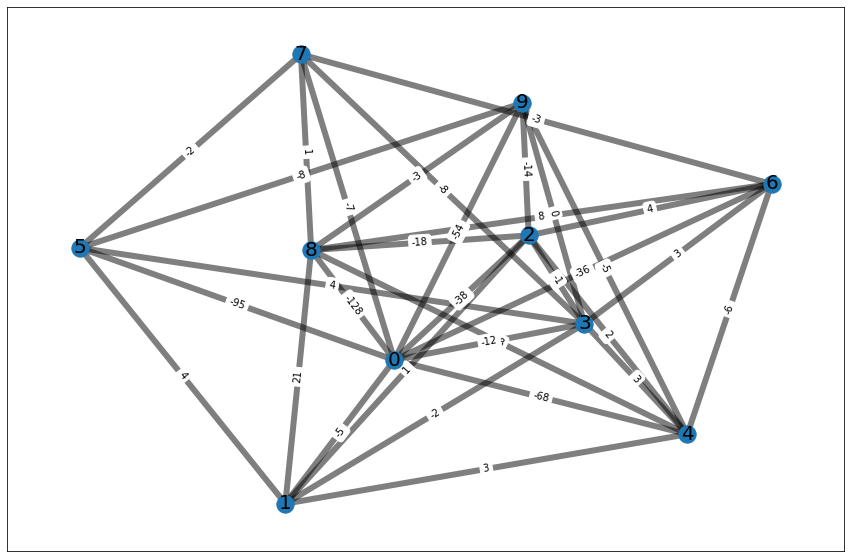

In [ ]:
# network visualization

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

G = nx.from_pandas_edgelist(df_Q3_nx, source='Current_value', target='Target_value', edge_attr='Total_change')


pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(
    G, pos, edgelist=G.edges, width=6, alpha=0.5, edge_color="black"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20)
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "Total_change")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [ ]:
print(nx.centrality.closeness_centrality(G))
print(nx.degree_centrality(G))
print(nx.cluster.average_clustering(G))
print(nx.diameter(G))

{7: 0.6923076923076923, 8: 0.8181818181818182, 3: 0.9, 6: 0.75, 5: 0.6923076923076923, 9: 0.75, 4: 0.8181818181818182, 2: 0.8181818181818182, 1: 0.75, 0: 1.0}
{7: 0.5555555555555556, 8: 0.7777777777777777, 3: 0.8888888888888888, 6: 0.6666666666666666, 5: 0.5555555555555556, 9: 0.6666666666666666, 4: 0.7777777777777777, 2: 0.7777777777777777, 1: 0.6666666666666666, 0: 1.0}
0.7261904761904762
2
